In [1]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue' #create a dataset

In [2]:
import pandas as pd
company_data = pd.read_html(url)

In [3]:
type(company_data)

list

In [4]:
# creating a dataframe 
company_data = company_data[0]

In [5]:
company_data.head(3)

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1],State-owned,Ref.,Unnamed: 9_level_0
,Rank,Name,Industry,USD millions,USD millions,Employees,Headquarters[note 1],State-owned,Unnamed: 8_level_1,Revenue per worker
0,1,Walmart,Retail,"$611,289","$11,680",2100000,United States,NaN,[1],"$291,090.00"
1,2,Saudi Aramco,Oil and gas,"$603,651","$159,069",70496,Saudi Arabia,NaN,[4],"$8,562,911.37"
2,3,State Grid Corporation of China,Electricity,"$530,009","$8,192",870287,China,NaN,[5],"$609,004.85"


#### Data Cleaning

In [6]:
company_data.columns

MultiIndex([(                'Rank',                 'Rank'),
            (                'Name',                 'Name'),
            (            'Industry',             'Industry'),
            (             'Revenue',         'USD millions'),
            (              'Profit',         'USD millions'),
            (           'Employees',            'Employees'),
            ('Headquarters[note 1]', 'Headquarters[note 1]'),
            (         'State-owned',          'State-owned'),
            (                'Ref.',   'Unnamed: 8_level_1'),
            (  'Unnamed: 9_level_0',   'Revenue per worker')],
           )

In [7]:
company_data.columns = company_data.columns.get_level_values(0) #changing the multi index columns to single index columns

In [8]:
company_data.columns

Index(['Rank', 'Name', 'Industry', 'Revenue', 'Profit', 'Employees',
       'Headquarters[note 1]', 'State-owned', 'Ref.', 'Unnamed: 9_level_0'],
      dtype='object')

In [9]:
company_data.head(3)

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1],State-owned,Ref.,Unnamed: 9_level_0
0,1,Walmart,Retail,"$611,289","$11,680",2100000,United States,NaN,[1],"$291,090.00"
1,2,Saudi Aramco,Oil and gas,"$603,651","$159,069",70496,Saudi Arabia,NaN,[4],"$8,562,911.37"
2,3,State Grid Corporation of China,Electricity,"$530,009","$8,192",870287,China,NaN,[5],"$609,004.85"


In [10]:
company_data.drop(['Ref.','Unnamed: 9_level_0','State-owned'], axis= 1, inplace= True) #dropping unwanted columns

In [11]:
company_data.head()

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1]
0,1,Walmart,Retail,"$611,289","$11,680",2100000,United States
1,2,Saudi Aramco,Oil and gas,"$603,651","$159,069",70496,Saudi Arabia
2,3,State Grid Corporation of China,Electricity,"$530,009","$8,192",870287,China
3,4,Amazon,Retail,"$513,983","−$2,722",1541000,United States
4,5,Vitol,Commodities,"$505,000","$15,000",1560,Switzerland


In [12]:
company_data.rename(columns={'Rank': 'Ranking',
                   'Name': 'Company Name',
                            'Headquarters[note 1]': 'Country',
                           'Revenue':'Revenue($)',
                            'Profit':'Profit($)'},
          inplace=True, errors='raise') #renaming some columns

In [13]:
company_data.head(3)

,Ranking,Company Name,Industry,Revenue($),Profit($),Employees,Country
0,1,Walmart,Retail,"$611,289","$11,680",2100000,United States
1,2,Saudi Aramco,Oil and gas,"$603,651","$159,069",70496,Saudi Arabia
2,3,State Grid Corporation of China,Electricity,"$530,009","$8,192",870287,China


In [14]:
company_data.dtypes  #chcking the data types of values in each columns

Ranking          int64
Company Name    object
Industry        object
Revenue($)      object
Profit($)       object
Employees        int64
Country         object
dtype: object

In [15]:
company_data['Revenue($)'] = company_data['Revenue($)'].str.replace('$','') #removing the dollar sign in order to change to float object data type

C:\Users\HPELIT~1\AppData\Local\Temp/ipykernel_3804/3655726942.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  company_data['Revenue($)'] = company_data['Revenue($)'].str.replace('$','') #removing the dollar sign in order to change to float object data type


In [16]:
company_data['Revenue($)'] = company_data['Revenue($)'].str.replace(',','')#removing the comma(,) sign from the Revenue column

In [17]:
company_data['Profit($)'] = company_data['Profit($)'].str.replace('$','') #removing the $ sign from the profit column

C:\Users\HPELIT~1\AppData\Local\Temp/ipykernel_3804/1033443516.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  company_data['Profit($)'] = company_data['Profit($)'].str.replace('$','') #removing the $ sign from the profit column


In [18]:
company_data['Profit($)'] = company_data['Profit($)'].str.replace(',','') #removing the comma(,) from the profit column

In [19]:
company_data.head(3)

,Ranking,Company Name,Industry,Revenue($),Profit($),Employees,Country
0,1,Walmart,Retail,611289,11680,2100000,United States
1,2,Saudi Aramco,Oil and gas,603651,159069,70496,Saudi Arabia
2,3,State Grid Corporation of China,Electricity,530009,8192,870287,China


In [20]:
company_data.info() #full information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ranking       50 non-null     int64 
 1   Company Name  50 non-null     object
 2   Industry      50 non-null     object
 3   Revenue($)    50 non-null     object
 4   Profit($)     50 non-null     object
 5   Employees     50 non-null     int64 
 6   Country       50 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


In [21]:
company_data['Profit($)'].unique() #checking for the uniques values in the column

array(['11680', '159069', '8192', '−2722', '15000', '21080', '9657',
       '55740', '99803', '20120', '4149', '6994', '4234', '−2282',
       '15233', '−1996', '59972', '3560', '18110', '20526', '17320',
       '−2487', '35465', '1699', '42398', '5844', '4751', '53589',
       '48145', '72738', '17669', '38524', '12454', '−933', '6668',
       '14516', '11024', '–1', '2035', '11528', '17641', '...', '16988',
       '1800', '2493', '8723', '−1981', '15252'], dtype=object)

In [22]:
company_data['Profit($)'] = company_data['Profit($)'].str.replace('−','') #changing the - sign i encountered to nothing, I coundnt change to float because of the sign

In [23]:
company_data['Profit($)'] = company_data['Profit($)'].str.replace('–','') 

In [24]:
company_data['Profit($)'] = company_data['Profit($)'].str.replace('...','1232') 

C:\Users\HPELIT~1\AppData\Local\Temp/ipykernel_3804/1399666639.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  company_data['Profit($)'] = company_data['Profit($)'].str.replace('...','1232')


In [25]:
company_data['Profit($)'].unique()

array(['123280', '12321232', '12322', '123200', '12327', '123240',
       '123203', '123220', '12329', '12324', '123233', '12326', '123272',
       '12320', '123210', '123226', '123265', '123298', '12321', '123289',
       '123245', '123238', '123269', '123224', '123254', '1232', '12328',
       '123216', '1', '12325', '123228', '123241', '123288', '12323',
       '123252'], dtype=object)

In [26]:
company_data[['Revenue($)', 'Profit($)']]= company_data[['Revenue($)','Profit($)']].astype('float64') 
#Revenue and profit data types has been changed to float data type

In [27]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       50 non-null     int64  
 1   Company Name  50 non-null     object 
 2   Industry      50 non-null     object 
 3   Revenue($)    50 non-null     float64
 4   Profit($)     50 non-null     float64
 5   Employees     50 non-null     int64  
 6   Country       50 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ KB


#### Data Wrangling

In [28]:
# creating the subset of the dat
subset = company_data.loc[[i for i in range(1,21)],['Revenue($)', 'Profit($)']]

In [29]:
subset

,Revenue($),Profit($)
1,603651.0,12321232.0
2,530009.0,12322.0
3,513983.0,12322.0
4,505000.0,123200.0
5,483019.0,123280.0
6,471154.0,12327.0
7,413680.0,123240.0
8,394328.0,123203.0
9,386201.0,123220.0
10,324162.0,123220.0


In [30]:
company_data

,Ranking,Company Name,Industry,Revenue($),Profit($),Employees,Country
0,1,Walmart,Retail,611289.0,123280.0,2100000,United States
1,2,Saudi Aramco,Oil and gas,603651.0,12321232.0,70496,Saudi Arabia
2,3,State Grid Corporation of China,Electricity,530009.0,12322.0,870287,China
3,4,Amazon,Retail,513983.0,12322.0,1541000,United States
4,5,Vitol,Commodities,505000.0,123200.0,1560,Switzerland
5,6,China National Petroleum Corporation,Oil and gas,483019.0,123280.0,1087049,China
6,7,China Petrochemical Corporation,Oil and gas,471154.0,12327.0,527487,China
7,8,ExxonMobil,Oil and gas,413680.0,123240.0,63000,United States
8,9,Apple,Electronics,394328.0,123203.0,164000,United States
9,10,Shell,Oil and gas,386201.0,123220.0,93000,United Kingdom


In [31]:
# Data filtering, trying to see the company with total employees more than 100,000
emp_data = company_data[company_data['Employees'] >=100000]

In [32]:
emp_data

,Ranking,Company Name,Industry,Revenue($),Profit($),Employees,Country
0,1,Walmart,Retail,611289.0,123280.0,2100000,United States
2,3,State Grid Corporation of China,Electricity,530009.0,12322.0,870287,China
3,4,Amazon,Retail,513983.0,12322.0,1541000,United States
5,6,China National Petroleum Corporation,Oil and gas,483019.0,123280.0,1087049,China
6,7,China Petrochemical Corporation,Oil and gas,471154.0,12327.0,527487,China
8,9,Apple,Electronics,394328.0,123203.0,164000,United States
10,11,UnitedHealth Group,Healthcare,324162.0,123220.0,400000,United States
11,12,CVS Health,Healthcare,322467.0,12329.0,259500,United States
13,14,China State Construction Engineering,Construction,305885.0,12324.0,382492,China
14,15,Berkshire Hathaway,Financials,302089.0,12322.0,383000,United States


#### Data grouping and Aggregation

In [33]:
company_data['Industry'].value_counts()  #grouping the dataset into the industry provided in the dataset

Oil and gas               13
Healthcare                 6
Financials                 5
Automotive                 5
Retail                     4
Commodities                3
Electronics                3
Construction               3
Electricity                2
Information technology     2
Conglomerate               2
Chemicals                  1
Steel                      1
Name: Industry, dtype: int64

In [34]:
company_data.groupby('Industry')['Company Name'].count() #grouping the company name according to the industry

Industry
Automotive                 5
Chemicals                  1
Commodities                3
Conglomerate               2
Construction               3
Electricity                2
Electronics                3
Financials                 5
Healthcare                 6
Information technology     2
Oil and gas               13
Retail                     4
Steel                      1
Name: Company Name, dtype: int64

<AxesSubplot:xlabel='Industry'>

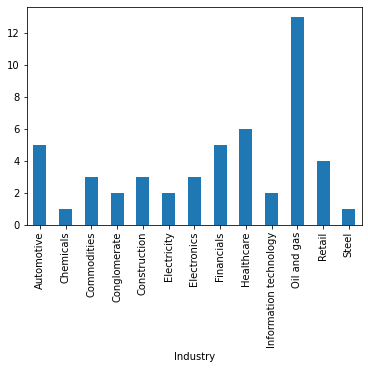

In [35]:
company_data.groupby('Industry')['Company Name'].count().plot(kind = 'bar') #plotting chart to display the industry with the highest number

In [36]:
#grouping the industry by the industry name
by_industry = company_data.groupby("Industry")

In [37]:
by_industry.get_group('Oil and gas') #grouping by the oil and gas industry

,Ranking,Company Name,Industry,Revenue($),Profit($),Employees,Country
1,2,Saudi Aramco,Oil and gas,603651.0,12321232.0,70496,Saudi Arabia
5,6,China National Petroleum Corporation,Oil and gas,483019.0,123280.0,1087049,China
6,7,China Petrochemical Corporation,Oil and gas,471154.0,12327.0,527487,China
7,8,ExxonMobil,Oil and gas,413680.0,123240.0,63000,United States
9,10,Shell,Oil and gas,386201.0,123220.0,93000,United Kingdom
20,21,TotalEnergies,Oil and gas,263310.0,123226.0,101279,France
22,23,BP,Oil and gas,248891.0,12327.0,67600,United Kingdom
23,24,Chevron,Oil and gas,246252.0,123265.0,43846,United States
36,37,Marathon Petroleum,Oil and gas,180012.0,123216.0,17800,United States
37,38,Phillips 66,Oil and gas,175702.0,123224.0,13000,United States


In [38]:
by_industry.get_group('Healthcare') #grouping by Healthcare

,Ranking,Company Name,Industry,Revenue($),Profit($),Employees,Country
10,11,UnitedHealth Group,Healthcare,324162.0,123220.0,400000,United States
11,12,CVS Health,Healthcare,322467.0,12329.0,259500,United States
18,19,McKesson,Healthcare,276711.0,12320.0,48000,United States
24,25,AmerisourceBergen,Healthcare,238587.0,12329.0,41500,United States
34,35,Cardinal Health,Healthcare,181364.0,1232.0,46035,United States
35,36,Cigna,Healthcare,180516.0,12328.0,70231,United States


In [39]:
company_data['Profit($)'].max() #getting the highest profit

12321232.0

In [40]:
company_data['Profit($)'].min() #getting the lowest profit

1.0

In [41]:
company_data['Country'].value_counts() #count of countries

United States     20
China             13
Germany            4
Switzerland        2
United Kingdom     2
Japan              2
Saudi Arabia       1
Singapore          1
France             1
South Korea        1
Taiwan             1
Netherlands        1
Russia             1
Name: Country, dtype: int64

<AxesSubplot:>

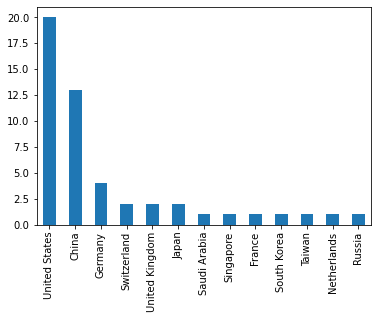

In [42]:
company_data['Country'].value_counts().plot(kind = 'bar')

In [43]:
by_employees = company_data[['Industry','Employees']]

In [44]:
tot= company_data.loc[[i for i in range(1,21)],['Company Name', 'Employees']] #grouping the data by Company Name and Number of Employees

In [45]:
tot

,Company Name,Employees
1,Saudi Aramco,70496
2,State Grid Corporation of China,870287
3,Amazon,1541000
4,Vitol,1560
5,China National Petroleum Corporation,1087049
6,China Petrochemical Corporation,527487
7,ExxonMobil,63000
8,Apple,164000
9,Shell,93000
10,UnitedHealth Group,400000


<AxesSubplot:xlabel='Company Name'>

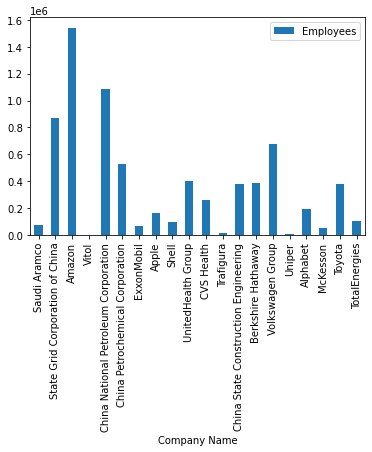

In [46]:
tot.plot(kind = 'bar', x = 'Company Name', y = 'Employees')